### Data Loading and Basic Exploration

In [33]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display  import display
from collections import Counter

In [2]:
# Load the dataset
cord = pd.read_csv('../data/metadata.csv', low_memory=False)

In [3]:
# display the first few rows of the dataset
display(cord.head())

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [4]:
# shape of the dataset
print(f"The dataset contains {cord.shape[0]} rows and {cord.shape[1]} columns.")

The dataset contains 1056660 rows and 19 columns.


In [5]:
# display the column names
print("Column names in the dataset:")
print(cord.columns.to_list())

Column names in the dataset:
['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files', 'url', 's2_id']


In [6]:
# check the data types of each column
print("Data types of each column:")
print(cord.dtypes)

Data types of each column:
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [7]:
# check for missing values
cord.isnull().sum()

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64

In [10]:
# summary statistics of numerical columns
cord.describe(include=['object', 'float64', 'int64']).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cord_uid,1056660,970836,kgpo6psq,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sha,373766,373719,31bc0fb718edaab9e33f678909710f62c40abebc,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_x,1056660,49,WHO,450459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,1056157,850366,Reply,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doi,656780,655525,10.1016/j.scitotenv.2020.139397,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pmcid,389571,389571,PMC7427695,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pubmed_id,498932,498449,33117894,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
license,1056660,18,unk,601506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abstract,821116,730712,[Figure: see text].,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publish_time,1054846,8056,2021,233709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Preparation

In [11]:
# check number of missing values in each column
missing_values = cord.isnull().sum()

# calculate percentage of missing values
missing_percentage = (missing_values / len(cord)) * 100

# create a dataframe to display missing values and their percentages
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
    })

# display columns with missing values and their percentages
missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=True)

,Missing Values,Percentage
title,503,0.047603
publish_time,1814,0.171673
authors,23869,2.258910
s2_id,80192,7.589196
journal,87322,8.263964
abstract,235544,22.291371
url,369726,34.990063
doi,399880,37.843772
pubmed_id,557728,52.782163
who_covidence_id,573725,54.296084


In [12]:
# drop columns with more than 50% missing values
threshold = len(cord) * 0.5
cord = cord.dropna(thresh=threshold, axis=1)

In [ ]:
# drop missing values NaN, NULL
cord = cord.dropna()

In [14]:
# check for missing values again
cord.isnull().sum()

cord_uid        0
source_x        0
title           0
doi             0
license         0
abstract        0
publish_time    0
authors         0
journal         0
url             0
s2_id           0
dtype: int64

In [15]:
# check the new shape of the dataset
print(f"After cleaning, the dataset contains {cord.shape[0]} rows and {cord.shape[1]} columns.")

After cleaning, the dataset contains 437010 rows and 11 columns.


In [16]:
# rename the cleaned dataset
cord_cleaned = cord.copy()

In [77]:
# saving the cleaned dataset to a new CSV file
cord_cleaned.to_csv('../data/cord_cleaned.csv', index=False)

##### ----Prepare the cleaned dataset for analysis and modelling

In [17]:
# convert date column to datetime format
cord_cleaned['publish_time'] = pd.to_datetime(cord_cleaned['publish_time'], errors='coerce')

# extract year from publish_time
cord_cleaned['year'] = cord_cleaned['publish_time'].dt.year

In [18]:
# create a new column for the length of the abstract
cord_cleaned['abstract_word_count'] = cord_cleaned['abstract'].astype(str).apply(len)

In [19]:
# create a new column for the number of authors
cord_cleaned['num_authors'] = cord_cleaned['authors'].astype(str).apply

### Data Analysis and Visualization

In [ ]:
# count the number of papers published each year
papers_per_year = cord_cleaned['year'].value_counts().sort_index()


Number of papers published each year:


In [31]:
# displaying the number of papers published in the first 5 years
papers_per_year.head(5)

year
1969.0    2
1970.0    3
1972.0    1
1973.0    2
1974.0    1
Name: count, dtype: int64

In [28]:
# identify top journals publishing COVID-19 research
top_journals = cord_cleaned['journal'].value_counts()

In [32]:
# displaying the top 5 journals
top_journals.head(5)

journal
bioRxiv                            8913
Int J Environ Res Public Health    7282
PLoS One                           5895
Sci Rep                            3361
Cureus                             3088
Name: count, dtype: int64

In [34]:
# find the most frequent words in the titles
title_words = ' '.join(cord_cleaned['title'].astype(str)).lower().split()
word_frequency = Counter(title_words)

In [52]:
# display the 10 most common words in titles
print("\nThe 10 most common words in title column are:")

print(f"{'Word' :<20} {'Count':<20}")
print('.' * 27)

# get and print the 10 most common words
for word, count in word_frequency.most_common(10):
    print(f"{word:<20} {count:<20}")



The 10 most common words in title column are:
Word                 Count               
...........................
of                   329134              
and                  248445              
in                   231926              
the                  229056              
a                    159824              
covid-19             123202              
for                  91362               
with                 74142               
to                   64805               
on                   55644               


##### ----Data Visualization

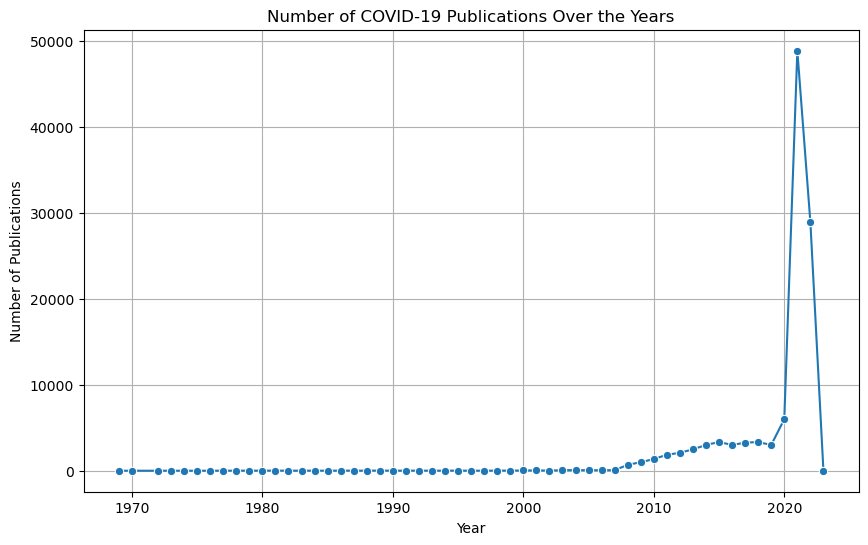

In [53]:
# plot of number of publications over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=papers_per_year.index, y=papers_per_year.values, marker='o')
plt.title('Number of COVID-19 Publications Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid()
plt.show()

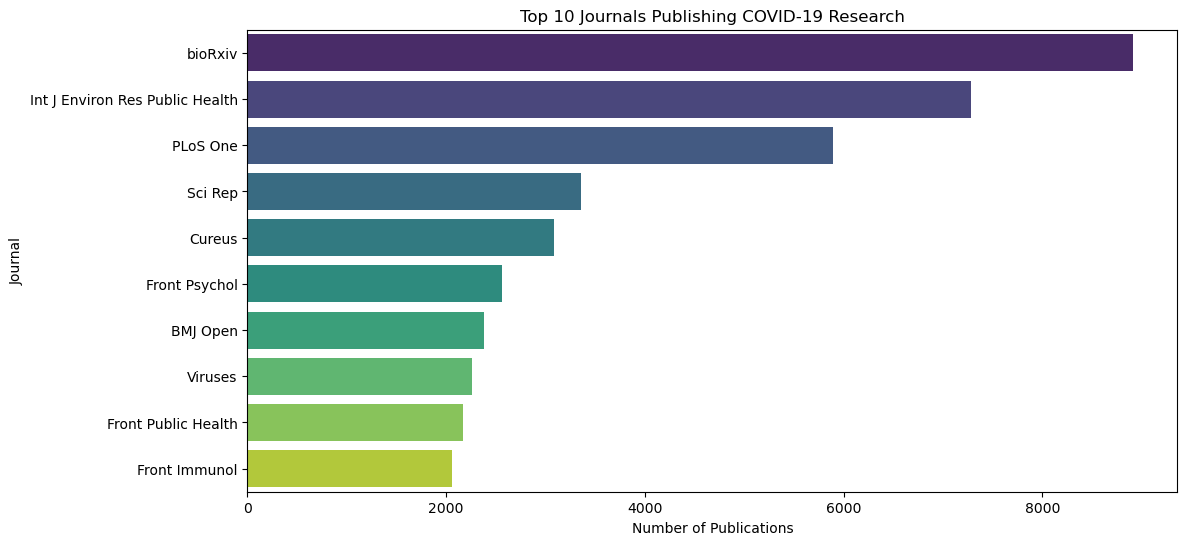

In [58]:
# a bar chart of the top publishing journals
plt.figure(figsize=(12, 6))
sns.barplot(x=top_journals.head(10).values, y=top_journals.head(10).index, hue=top_journals.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Journals Publishing COVID-19 Research')
plt.xlabel('Number of Publications')
plt.ylabel('Journal')
plt.show()

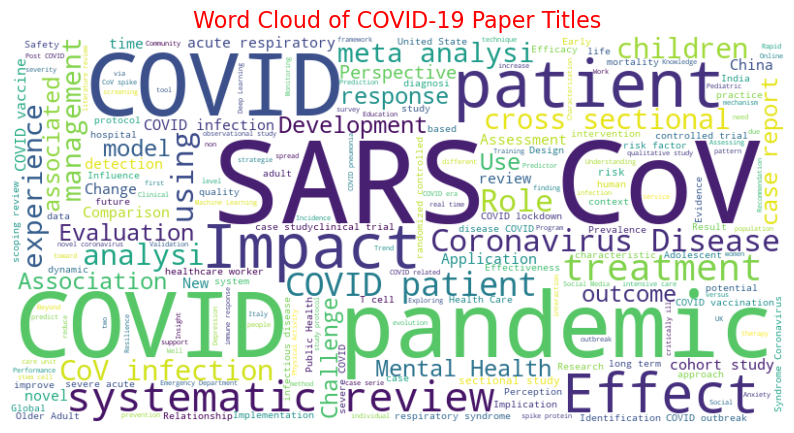

In [69]:
# generate a word cloud of paper titles

# import WordCloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cord_cleaned['title']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of COVID-19 Paper Titles', color='red', fontsize=16)
plt.show()

/tmp/ipykernel_21559/1636280368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='source_x', data=cord_cleaned, order=cord_cleaned['source_x'].value_counts().index, palette='coolwarm')


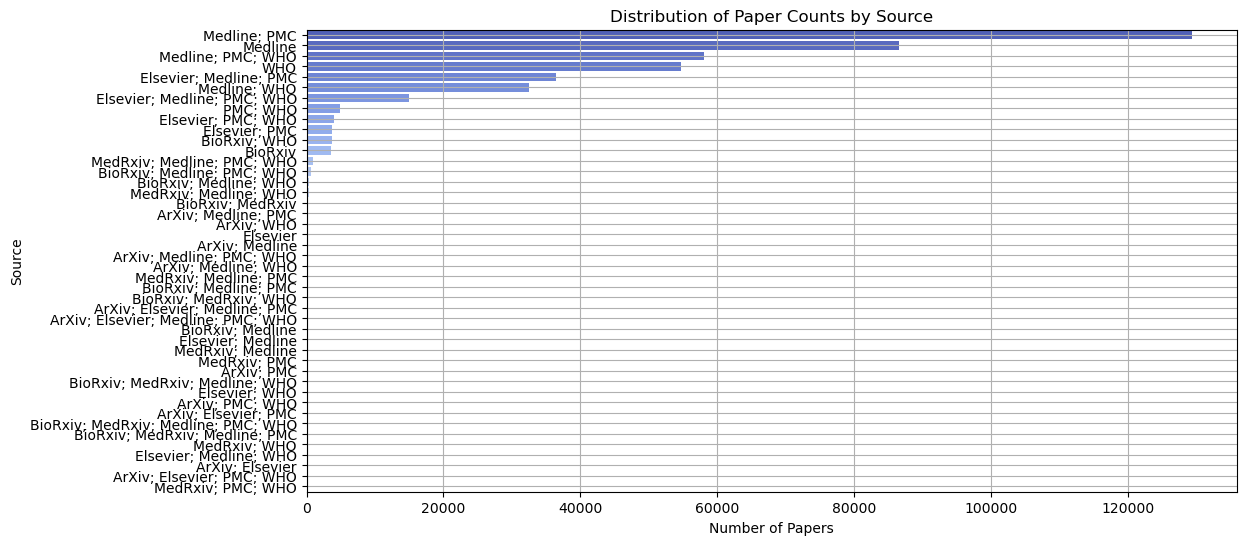

In [76]:
# plot distribution of paper counts by source
plt.figure(figsize=(12, 6))
sns.countplot(y='source_x', data=cord_cleaned, order=cord_cleaned['source_x'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Paper Counts by Source')
plt.xlabel('Number of Papers')
plt.ylabel('Source')
plt.grid()
plt.show()

In [ ]:
# outlier detection in abstract word count
plt.figure(figsize=(10, 6))
sns.boxplot(x=cord_cleaned['abstract_word_count'], color='lightblue')
plt.title('Box Plot of Abstract Word Count')
plt.xlabel('Abstract Word Count')
plt.grid()
plt.show()

In [ ]:
numerical = cord_cleaned.select_dtypes(include=['float64', 'int64'])
for i in numerical.columns:
    print(f"Skewness of {i}: {cord_cleaned[i].skew()}")
    print(f"Standart deviation of {i}: {df[i].std()}")
    # Outlier detection using IQR method
    Q1 = cord_cleaned[i].quantile(0.25)
    Q3 = cord_cleaned[i].quantile(0.75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cord_cleaned[(cord_cleaned[i] < lower_bound) | (cord_cleaned[i] > upper_bound)]
    print(f"Number of outliers in {i}: {len(outliers)}")
    print("------------------------------------")
